# **The Problem & Business Importance**





# **Data Identification & Analysis**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import joblib

from KNN_D import KNN_D

from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV,train_test_split , KFold
from sklearn.linear_model import LogisticRegression , RidgeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv('i4talent_dataset.csv')
df['datum'] = pd.to_datetime(df['datum'])
df['geboortedatum'] = pd.to_datetime(df['geboortedatum'])
df['indiensttreding_datum'] = pd.to_datetime(df['indiensttreding_datum'])


In [3]:
df.head()

,WerknemerID,datum,geboortedatum,indiensttreding_datum,uitdiensttreding_datum,leeftijd,lengte_dienst,stad,afdeling,klant_id,geslacht_id,geslacht,uitdiensttreding_reden,uitdiensttreding_type,STATUS_JAAR,STATUS,BUSINESS_UNIT
0,6962,2018-12-31 05:06:00,1989-06-26 05:06:00,2013-05-23 05:06:00,1905-01-01 05:06:00,29.0,5.0,Amstelveen,BI,30,V,Vrouw,Niet van toepassing,Niet van toepassing,2018,Actief,Detachering
1,6212,2016-12-30 05:06:00,1983-08-25 05:06:00,2010-04-24 05:06:00,1905-01-01 05:06:00,33.0,6.0,Utrecht,Accountant,21,M,Man,Niet van toepassing,Niet van toepassing,2016,Actief,Detachering
2,5325,2018-12-31 05:06:00,1976-04-24 05:06:00,2006-06-09 05:06:00,1905-01-01 05:06:00,42.0,12.0,Amsterdam,BI,42,V,Vrouw,Niet van toepassing,Niet van toepassing,2018,Actief,Detachering
3,8193,2018-12-31 05:06:00,1998-10-26 05:06:00,2018-04-28 05:06:00,1905-01-01 05:06:00,20.0,NaN,Utrecht,BI,21,V,Vrouw,Niet van toepassing,Niet van toepassing,2018,Actief,Detachering
4,5926,2013-12-31 05:06:00,1981-03-19 05:06:00,2009-01-09 05:06:00,1905-01-01 05:06:00,32.0,4.0,Den Haag,Accountant,18,M,Man,Niet van toepassing,Niet van toepassing,2013,Actief,Detachering


In [4]:
df.describe()

,WerknemerID,datum,geboortedatum,indiensttreding_datum,leeftijd,lengte_dienst,klant_id,STATUS_JAAR
count,49753.000000,49753,49753,49753,44653.000000,44802.000000,49753.000000,49753.000000
mean,4859.473600,2016-08-06 00:21:52.006914304,1974-01-10 05:10:34.379434400,2005-09-04 11:13:13.710530176,42.046223,10.442592,27.296525,2015.612566
min,1318.000000,2011-01-01 05:06:00,1946-01-15 05:06:00,1994-08-28 05:06:00,19.000000,0.000000,1.000000,2011.000000
25%,3360.000000,2013-12-31 05:06:00,1963-05-28 05:06:00,2000-06-01 05:06:00,31.000000,5.000000,16.000000,2013.000000
50%,5031.000000,2016-12-30 05:06:00,1973-12-04 05:06:00,2005-03-31 05:06:00,42.000000,10.000000,28.000000,2016.000000
75%,6335.000000,2018-12-31 05:06:00,1984-07-17 05:06:00,2010-10-13 05:06:00,53.000000,15.000000,42.000000,2018.000000
max,8336.000000,2020-12-30 05:06:00,1999-12-31 05:06:00,2018-12-11 05:06:00,65.000000,26.000000,46.000000,2020.000000
std,1827.113618,NaN,NaN,NaN,12.424199,6.326893,13.512861,2.845621


In [5]:
print(df.isna().sum())

WerknemerID                  0
datum                        0
geboortedatum                0
indiensttreding_datum        0
uitdiensttreding_datum       0
leeftijd                  5100
lengte_dienst             4951
stad                      5543
afdeling                  5065
klant_id                     0
geslacht_id                  0
geslacht                     0
uitdiensttreding_reden       0
uitdiensttreding_type        0
STATUS_JAAR                  0
STATUS                       0
BUSINESS_UNIT                0
dtype: int64


In [6]:
df['leeftijd'] = df['leeftijd'].fillna((df['datum'] - df['geboortedatum']).dt.days // 365)
df['lengte_dienst'] = df['lengte_dienst'].fillna((df['datum'] - df['indiensttreding_datum']).dt.days // 365)


In [7]:
df_sort = df.sort_values(by=['WerknemerID', 'datum'])
# filling in the missing values based on values that where put first.
df_sort['stad'] = df_sort.groupby('WerknemerID')['stad'].ffill()
most_common_value = df_sort['stad'].mode()[0]  
df_sort['stad'] = df_sort['stad'].fillna(most_common_value)

df_sort['afdeling'] = df_sort.groupby('WerknemerID')['afdeling'].ffill()
most_common_value_2 = df_sort['afdeling'].mode()[0]  
df_sort['afdeling'] = df_sort['afdeling'].fillna(most_common_value_2)

In [8]:
df_sort = df_sort.sort_values(by='datum', ascending=False)
df_sort = df_sort.drop_duplicates(subset='WerknemerID', keep='first')

WerknemerID               6284
datum                     6284
geboortedatum             6284
indiensttreding_datum     6284
uitdiensttreding_datum    6284
leeftijd                  6284
lengte_dienst             6284
stad                      6284
afdeling                  6284
klant_id                  6284
geslacht_id               6284
geslacht                  6284
uitdiensttreding_reden    6284
uitdiensttreding_type     6284
STATUS_JAAR               6284
STATUS                    6284
BUSINESS_UNIT             6284
dtype: int64

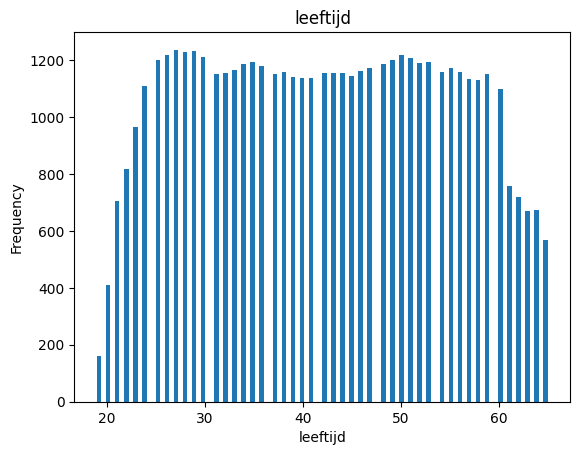

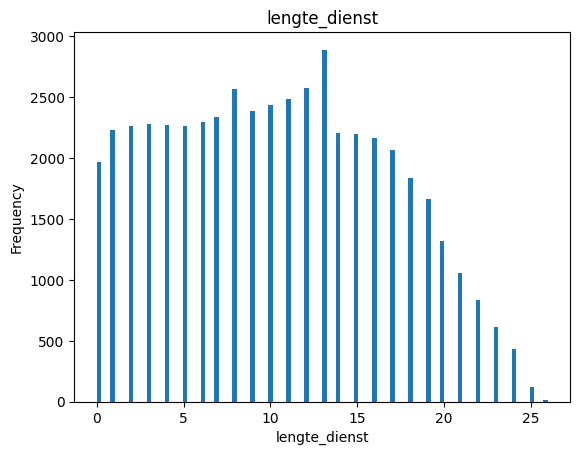

In [9]:
columns_numerical_with_nas = ['leeftijd', 'lengte_dienst']
for col in columns_numerical_with_nas:
    plt.hist(df[col], bins=100)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [10]:
columns_to_delete = ['geboortedatum', 'WerknemerID', 'uitdiensttreding_datum', 'indiensttreding_datum', 'geslacht', 'uitdiensttreding_type', 'datum', 'STATUS_JAAR', 'uitdiensttreding_reden']
df_new = df_sort.drop(columns=columns_to_delete)


In [11]:
df_with_dummies = pd.get_dummies(df_new, columns=['stad', 'afdeling', 'geslacht_id', 'STATUS', 'BUSINESS_UNIT'], drop_first=True , dtype = int)

geboortedatum, WerknemerID, uitdiensttreding_datum, indiensttreding_datum, geslacht, uitdiensttreding_type

Dummies: 'stad', 'afdeling', 'geslachtID', 'uitdiensttreding_reden', 'Status', 'BUSINESS_UNIT'

In [12]:
#Used later for model evaluation
model_scores = {}

#You can download the pretrained models here : https://github.com/dvanaanhout/GROUP5
#Saves time running the file.

In [13]:
X = df_with_dummies.drop(columns=['STATUS_Beëindigd'])
y = df_with_dummies['STATUS_Beëindigd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:

saved_model_name = 'model_lr.joblib'

if os.path.exists(saved_model_name):
    loaded_model = joblib.load(saved_model_name)
    model_lr = loaded_model
else:
    model_lr = LogisticRegression()
    model_lr.fit(X_train, y_train)
    joblib.dump(model_lr, saved_model_name)

y_pred = model_lr.predict(X_test)

params = model_lr.get_params()
train_score = model_lr.score(X_train, y_train)
test_score = model_lr.score(X_test, y_test)


model_scores['Logistic Regression'] = {
    'Train Score': train_score,
    'Test Score': test_score,
    'Used parameters' : params
}


conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")
print("Confusion Matrix:")
print(conf_matrix)
print(classification_report(y_test, y_pred))



Train Score: 0.9600159140640541
Test Score: 0.9626093874303898
Confusion Matrix:
[[956   2]
 [ 45 254]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       958
           1       0.99      0.85      0.92       299

    accuracy                           0.96      1257
   macro avg       0.97      0.92      0.95      1257
weighted avg       0.96      0.96      0.96      1257



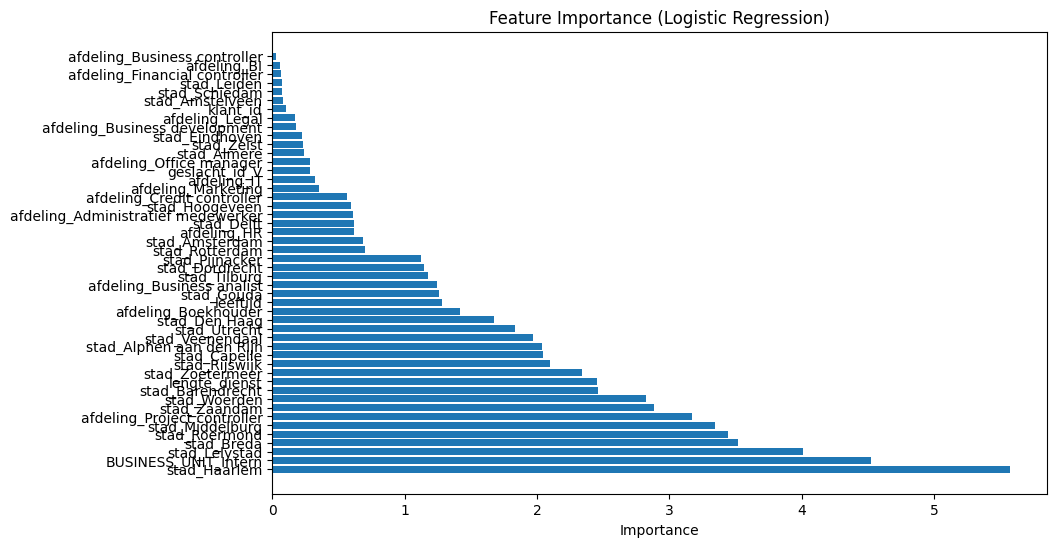

In [15]:
coefficients = model_lr.coef_[0]

feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients,
    'Importance': np.abs(coefficients)
})

feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance (Logistic Regression)')
plt.show()

In [16]:
saved_model_name = 'model_lr_TUNED.joblib'

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
}

if os.path.exists(saved_model_name):
    loaded_model = joblib.load(saved_model_name)
    model_lr_TUNED = loaded_model
else:
    grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    model_lr_TUNED = grid_search.best_estimator_
    joblib.dump(model_lr_TUNED, saved_model_name)

y_pred = model_lr_TUNED.predict(X_test)

train_score = model_lr_TUNED.score(X_train, y_train)
test_score = model_lr_TUNED.score(X_test, y_test)

params = model_lr_TUNED.get_params()

model_scores['Logistic Regression TUNED'] = {
    'Train Score': train_score,
    'Test Score': test_score,
    'Used parameters' : params
}

conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")
print("Confusion Matrix:")
print(conf_matrix)
print(classification_report(y_test, y_pred))

c:\Users\lickm\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\lickm\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Train Score: 0.959419136662025
Test Score: 0.9657915672235481
Confusion Matrix:
[[956   2]
 [ 41 258]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       958
           1       0.99      0.86      0.92       299

    accuracy                           0.97      1257
   macro avg       0.98      0.93      0.95      1257
weighted avg       0.97      0.97      0.96      1257



c:\Users\lickm\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\lickm\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [17]:
saved_model_name = 'model_HGBC.joblib'

if os.path.exists(saved_model_name):
    loaded_model = joblib.load(saved_model_name)
    model_hgb = loaded_model

else:
    model_hgb = HistGradientBoostingClassifier()
    model_hgb.fit(X_train, y_train)
    joblib.dump(model_hgb, saved_model_name)


y_pred = model_hgb.predict(X_test)

train_score = model_hgb.score(X_train, y_train)
test_score = model_hgb.score(X_test, y_test)

params = model_hgb.get_params()

model_scores['Hist Gradient Boosting'] = {
    'Train Score': train_score,
    'Test Score': test_score,
    'Used parameters' : params
}

print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")
print(classification_report(y_test, y_pred))

Train Score: 0.9980107419932365
Test Score: 0.9840891010342084
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       958
           1       0.98      0.95      0.97       299

    accuracy                           0.98      1257
   macro avg       0.98      0.97      0.98      1257
weighted avg       0.98      0.98      0.98      1257



In [18]:
saved_model_name = 'model_HGBC_TUNED.joblib'

if os.path.exists(saved_model_name):
    loaded_model = joblib.load(saved_model_name)
    model_HGBC_TUNED = loaded_model
else:
    model_HGBC_TUNED = HistGradientBoostingClassifier()
    param_grid = {
        'max_iter': [100, 200,300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7, 9, 21, 25],
        'min_samples_leaf': [1, 5, 10, 15, 20]
    }

    grid_search = GridSearchCV(estimator=model_HGBC_TUNED, param_grid=param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model_HGBC_TUNED = grid_search.best_estimator_
    joblib.dump(best_model_HGBC_TUNED, saved_model_name)
    model_HGBC_TUNED = best_model_HGBC_TUNED

y_pred = model_HGBC_TUNED.predict(X_test)

train_score = model_HGBC_TUNED.score(X_train, y_train)
test_score = model_HGBC_TUNED.score(X_test, y_test)

params = model_HGBC_TUNED.get_params()

model_scores['Hist Gradient Boosting TUNED'] = {
    'Train Score': train_score,
    'Test Score': test_score,
    'Used parameters' : params
}

print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")

print(classification_report(y_test, y_pred))

KeyboardInterrupt: 

In [21]:
saved_model_name = 'model_KNN.joblib'

if os.path.exists(saved_model_name):
    loaded_model = joblib.load(saved_model_name)
    model_knn = loaded_model
else:
    model_knn = KNeighborsClassifier()
    model_knn.fit(X_train, y_train)
    joblib.dump(model_knn, saved_model_name)

y_pred = model_knn.predict(X_test)

train_score = model_knn.score(X_train, y_train)
test_score = model_knn.score(X_test, y_test)

params = model_knn.get_params()

model_scores['KNN'] = {
    'Train Score': train_score,
    'Test Score': test_score,
    'Used parameters' : params
}

conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")
print(classification_report(y_test, y_pred))

Train Score: 0.9566341754525562
Test Score: 0.9403341288782816
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       958
           1       0.97      0.77      0.86       299

    accuracy                           0.94      1257
   macro avg       0.95      0.88      0.91      1257
weighted avg       0.94      0.94      0.94      1257



In [22]:

saved_model_name = 'model_KNN_TUNED.joblib'

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11]
}

if os.path.exists(saved_model_name):
    loaded_model = joblib.load(saved_model_name)
    model_knn_TUNED = loaded_model
else:
    grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    model_knn_TUNED = grid_search.best_estimator_
    print(f"Best Parameters: {grid_search.best_params_}")
    joblib.dump(model_knn_TUNED, saved_model_name)

y_pred = model_knn_TUNED.predict(X_test)

train_score = model_knn_TUNED.score(X_train, y_train)
test_score = model_knn_TUNED.score(X_test, y_test)

params = model_knn_TUNED.get_params()

model_scores['KNN TUNED'] = {
    'Train Score': train_score,
    'Test Score': test_score,
    'Used parameters' : params
}

conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")

print(classification_report(y_test, y_pred))

KeyboardInterrupt: 

In [23]:
model_KNN_D = KNN_D()
model_KNN_D.fit(X_train, y_train)


y_train_pred = model_KNN_D.predict(X_train)
y_test_pred = model_KNN_D.predict(X_test)


train_score = accuracy_score(y_train, y_train_pred)
test_score = accuracy_score(y_test, y_test_pred)

model_scores['KNN_D'] = {
    'Train Score': train_score,
    'Test Score': test_score,
    'Used parameters' : 'dcalc = Euclidean , NN = 5'
}

print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

KeyboardInterrupt: 

In [26]:
saved_model_name = 'model_XGBoost.joblib'


if os.path.exists(saved_model_name):
    loaded_model = joblib.load(saved_model_name)
    model_xgboost = loaded_model
else:
    model_xgboost = XGBClassifier()
    model_xgboost.fit(X_train, y_train)
    joblib.dump(model_xgboost, saved_model_name)

y_pred = model_xgboost.predict(X_test)

train_score = model_xgboost.score(X_train, y_train)
test_score = model_xgboost.score(X_test, y_test)

params = model_xgboost.get_params()

model_scores['XGBoost Classifier'] = {
    'Train Score': train_score,
    'Test Score': test_score,
    'Used parameters' : params
}
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")

print(classification_report(y_test, y_pred))

[[954   4]
 [ 12 287]]
Train Score: 0.9978118161925602
Test Score: 0.9872712808273667
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       958
           1       0.99      0.96      0.97       299

    accuracy                           0.99      1257
   macro avg       0.99      0.98      0.98      1257
weighted avg       0.99      0.99      0.99      1257



In [ ]:
saved_model_name = 'model_XGBoost_TUNED.joblib'

if os.path.exists(saved_model_name):
    loaded_model = joblib.load(saved_model_name)
    model_xgboost_TUNED = loaded_model
else:
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    }
    grid_search = GridSearchCV(XGBClassifier(), param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    model_xgboost_TUNED = grid_search.best_estimator_
    joblib.dump(model_xgboost_TUNED, saved_model_name)

y_pred = model_xgboost_TUNED.predict(X_test)

train_score = model_xgboost_TUNED.score(X_train, y_train)
test_score = model_xgboost_TUNED.score(X_test, y_test)

params = model_xgboost_TUNED.get_params()

model_scores['XGBoost Classifier TUNED'] = {
    'Train Score': train_score,
    'Test Score': test_score,
    'Used parameters' : params
}

print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")

print(classification_report(y_test, y_pred))

Train Score: 0.9865584643987739
Test Score: 0.9869359863330318
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9660
           1       0.98      0.56      0.72       291

    accuracy                           0.99      9951
   macro avg       0.98      0.78      0.85      9951
weighted avg       0.99      0.99      0.99      9951



In [ ]:
saved_model_name = 'model_ridge.joblib'

if os.path.exists(saved_model_name):
    loaded_model = joblib.load(saved_model_name)
    model_ridge = loaded_model
else:
    model_ridge = RidgeClassifier()
    model_ridge.fit(X_train, y_train)
    joblib.dump(model_ridge, saved_model_name)


y_pred = model_ridge.predict(X_test)

train_score = model_ridge.score(X_train, y_train)
test_score = model_ridge.score(X_test, y_test)

params = model_ridge.get_params()

model_scores['Ridge Classifier'] = {
    'Train Score': train_score,
    'Test Score': test_score,
    'Used parameters' : params
}

conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Train Score: 0.9699512587307171
Test Score: 0.970756707868556
Confusion Matrix:
[[9660    0]
 [ 291    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      9660
           1       0.00      0.00      0.00       291

    accuracy                           0.97      9951
   macro avg       0.49      0.50      0.49      9951
weighted avg       0.94      0.97      0.96      9951



c:\Users\lickm\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelBinarizer from version 1.4.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\lickm\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RidgeClassifier from version 1.4.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\lickm\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision

In [ ]:
saved_model_name = 'model_ridge_TUNED.joblib'

if os.path.exists(saved_model_name):
    loaded_model = joblib.load(saved_model_name)
    model_ridge_TUNED = loaded_model
else:
    model_ridge_TUNED = RidgeClassifier()
    model_ridge_TUNED.fit(X_train, y_train)
    joblib.dump(model_ridge_TUNED, saved_model_name)

param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
}

y_pred = model_ridge_TUNED.predict(X_test)

train_score = model_ridge_TUNED.score(X_train, y_train)
test_score = model_ridge_TUNED.score(X_test, y_test)

params = model_ridge_TUNED.get_params()

model_scores['Ridge Classifier TUNED'] = {
    'Train Score': train_score,
    'Test Score': test_score,
    'Used parameters' : params
}

conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report(y_test, y_pred))

c:\Users\lickm\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelBinarizer from version 1.4.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\lickm\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RidgeClassifier from version 1.4.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Train Score: 0.9699512587307171
Test Score: 0.970756707868556
Confusion Matrix:
[[9660    0]
 [ 291    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      9660
           1       0.00      0.00      0.00       291

    accuracy                           0.97      9951
   macro avg       0.49      0.50      0.49      9951
weighted avg       0.94      0.97      0.96      9951



c:\Users\lickm\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lickm\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lickm\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [30]:
saved_model_name = 'model_lasso_classifier.joblib'

if os.path.exists(saved_model_name):
    loaded_model = joblib.load(saved_model_name)
    model_lasso_classifier = loaded_model
else:
    model_lasso_classifier = LogisticRegression(penalty='l1', solver='saga', max_iter=1000)
    model_lasso_classifier.fit(X_train, y_train)
    joblib.dump(model_lasso_classifier, saved_model_name)


y_pred = model_lasso_classifier.predict(X_test)

train_score = model_lasso_classifier.score(X_train, y_train)
test_score = model_lasso_classifier.score(X_test, y_test)

params = model_lasso_classifier.get_params()

model_scores['Lasso Classifier'] = {
    'Train Score': train_score,
    'Test Score': test_score,
    'Used parameters' : params
}

conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Train Score: 0.9478814402227969
Test Score: 0.9482895783611774
Confusion Matrix:
[[956   2]
 [ 63 236]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       958
           1       0.99      0.79      0.88       299

    accuracy                           0.95      1257
   macro avg       0.96      0.89      0.92      1257
weighted avg       0.95      0.95      0.95      1257



c:\Users\lickm\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
saved_model_name = 'model_lasso_classifier_TUNED.joblib'

if os.path.exists(saved_model_name):
    loaded_model = joblib.load(saved_model_name)
    model_lasso_classifier_TUNED = loaded_model
else:
    param_grid = {
        'C': [0.01, 0.1, 1, 10, 100],
        'max_iter': [1000, 2000]
    }
    base_model = LogisticRegression(penalty='l1', solver='saga')
    grid_search = GridSearchCV(base_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    model_lasso_classifier_TUNED = grid_search.best_estimator_
    joblib.dump(model_lasso_classifier_TUNED, saved_model_name)


y_pred = model_lasso_classifier_TUNED.predict(X_test)

train_score = model_lasso_classifier_TUNED.score(X_train, y_train)
test_score = model_lasso_classifier_TUNED.score(X_test, y_test)

params = model_lasso_classifier_TUNED.get_params()

model_scores['Lasso Classifier TUNED'] = {
    'Train Score': train_score,
    'Test Score': test_score,
    'Used parameters' : params
}

conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Train Score: 0.9699512587307171
Test Score: 0.970756707868556
Confusion Matrix:
[[9660    0]
 [ 291    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      9660
           1       0.00      0.00      0.00       291

    accuracy                           0.97      9951
   macro avg       0.49      0.50      0.49      9951
weighted avg       0.94      0.97      0.96      9951



c:\Users\lickm\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lickm\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lickm\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [27]:
saved_model_name = 'model_DTC.joblib'

if os.path.exists(saved_model_name):
    loaded_model = joblib.load(saved_model_name)
    model_DTC = loaded_model
else:
    model_DTC = DecisionTreeClassifier(random_state=42)
    model_DTC.fit(X_train, y_train)
    joblib.dump(model_DTC, saved_model_name)

y_pred = model_DTC.predict(X_test)

train_score = model_DTC.score(X_train, y_train)
test_score = model_DTC.score(X_test, y_test)

params = model_DTC.get_params()

model_scores['Decision Tree Classifier'] = {
    'Train Score': train_score,
    'Test Score': test_score,
    'Used parameters' : params
}

conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(conf_matrix)

Train Score: 0.9980107419932365
Test Score: 0.9824980111376292
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       958
           1       0.98      0.95      0.96       299

    accuracy                           0.98      1257
   macro avg       0.98      0.97      0.98      1257
weighted avg       0.98      0.98      0.98      1257

Confusion Matrix:
[[951   7]
 [ 15 284]]


In [ ]:
saved_model_name = 'model_DTC_TUNED.joblib'

if os.path.exists(saved_model_name):
    loaded_model = joblib.load(saved_model_name)
    model_DT_TUNED = loaded_model
else:
    param_grid = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    model_DT_TUNED = DecisionTreeClassifier(random_state=42)
    grid_search = GridSearchCV(estimator=model_DT_TUNED, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    model_DT_TUNED = grid_search.best_estimator_
    joblib.dump(model_DT_TUNED, saved_model_name)

y_pred = model_DT_TUNED.predict(X_test)

train_score = model_DT_TUNED.score(X_train, y_train)
test_score = model_DT_TUNED.score(X_test, y_test)

params = model_DT_TUNED.get_params()

model_scores['Decision Tree Classifier TUNED'] = {
    'Train Score': train_score,
    'Test Score': test_score,
    'Used parameters' : params
}

conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(conf_matrix)

Train Score: 0.9883674187226773
Test Score: 0.986232539443272
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9660
           1       0.92      0.58      0.71       291

    accuracy                           0.99      9951
   macro avg       0.96      0.79      0.85      9951
weighted avg       0.99      0.99      0.98      9951

Confusion Matrix:
[[9646   14]
 [ 123  168]]


In [28]:
saved_model_name = 'model_RandomForestClassifier.joblib'

if os.path.exists(saved_model_name):
    loaded_model = joblib.load(saved_model_name)
    model_RF = loaded_model
else:
    model_RF = RandomForestClassifier(random_state=42)
    model_RF.fit(X_train, y_train)
    joblib.dump(model_RF, saved_model_name)

y_pred = model_RF.predict(X_test)

train_score = model_RF.score(X_train, y_train)
test_score = model_RF.score(X_test, y_test)

params = model_RF.get_params()

model_scores['Random Forest Classifier'] = {
    'Train Score': train_score,
    'Test Score': test_score,
    'Used parameters' : params
}

conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(conf_matrix)



Train Score: 0.9980107419932365
Test Score: 0.9761336515513126
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       958
           1       0.98      0.92      0.95       299

    accuracy                           0.98      1257
   macro avg       0.98      0.96      0.97      1257
weighted avg       0.98      0.98      0.98      1257

Confusion Matrix:
[[952   6]
 [ 24 275]]


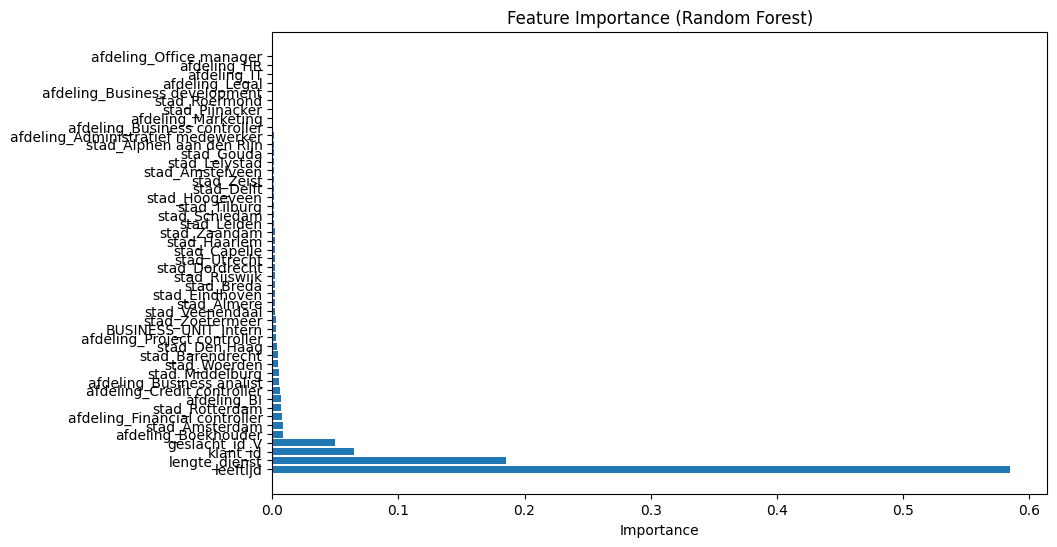

In [ ]:
importances = model_RF.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.show()

In [ ]:
saved_model_name = 'model_RandomForest_TUNED.joblib'

if os.path.exists(saved_model_name):
    loaded_model = joblib.load(saved_model_name)
    model_RF_TUNED = loaded_model
else:
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }
    grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    model_RF_TUNED = grid_search.best_estimator_
    joblib.dump(model_RF_TUNED, saved_model_name)

y_pred = model_RF_TUNED.predict(X_test)

train_score = model_RF_TUNED.score(X_train, y_train)
test_score = model_RF_TUNED.score(X_test, y_test)

params = model_RF_TUNED.get_params()

model_scores['Random Forest Classifier TUNED'] = {
    'Train Score': train_score,
    'Test Score': test_score,
    'Used parameters' : params
}

conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(conf_matrix)



Train Score: 0.9874126928295061
Test Score: 0.9863330318560949
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9660
           1       0.96      0.55      0.70       291

    accuracy                           0.99      9951
   macro avg       0.98      0.78      0.85      9951
weighted avg       0.99      0.99      0.98      9951

Confusion Matrix:
[[9654    6]
 [ 130  161]]


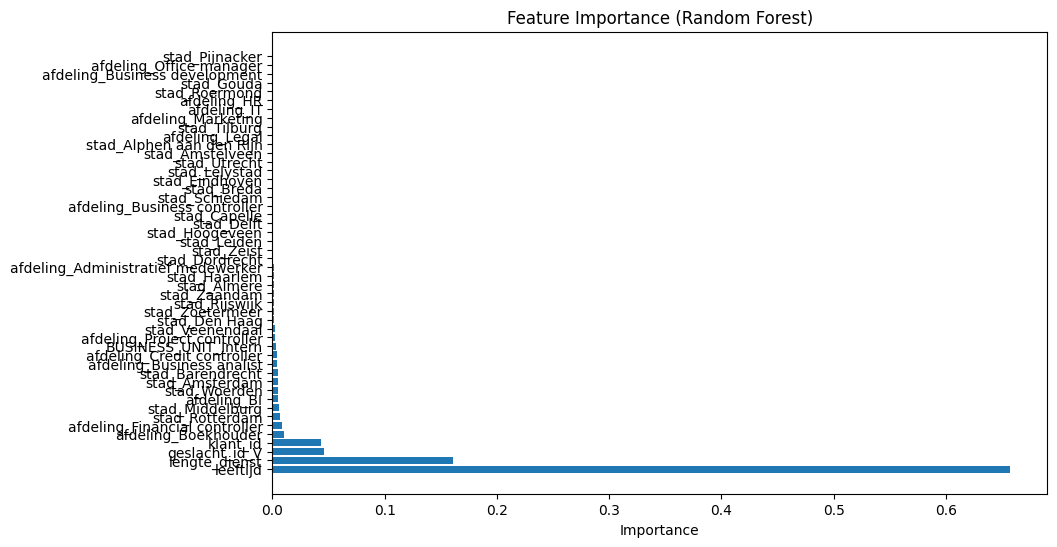

In [ ]:
importances = model_RF_TUNED.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.show()

In [29]:
saved_model_name = 'model_svm_classifier_DEFAULT.joblib'

if os.path.exists(saved_model_name):
    model_svm_classifier = joblib.load(saved_model_name)
else:
    model_svm_classifier = SVC()  
    model_svm_classifier.fit(X_train, y_train)
    joblib.dump(model_svm_classifier, saved_model_name)

y_pred = model_svm_classifier.predict(X_test)

train_score = model_svm_classifier.score(X_train, y_train)
test_score = model_svm_classifier.score(X_test, y_test)

params = model_svm_classifier.get_params()

model_scores['SVM Classifier'] = {
    'Train Score': train_score,
    'Test Score': test_score,
    'Used parameters' : params
}

conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Train Score: 0.8750745971752536
Test Score: 0.8743038981702467
Confusion Matrix:
[[957   1]
 [157 142]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       958
           1       0.99      0.47      0.64       299

    accuracy                           0.87      1257
   macro avg       0.93      0.74      0.78      1257
weighted avg       0.89      0.87      0.86      1257



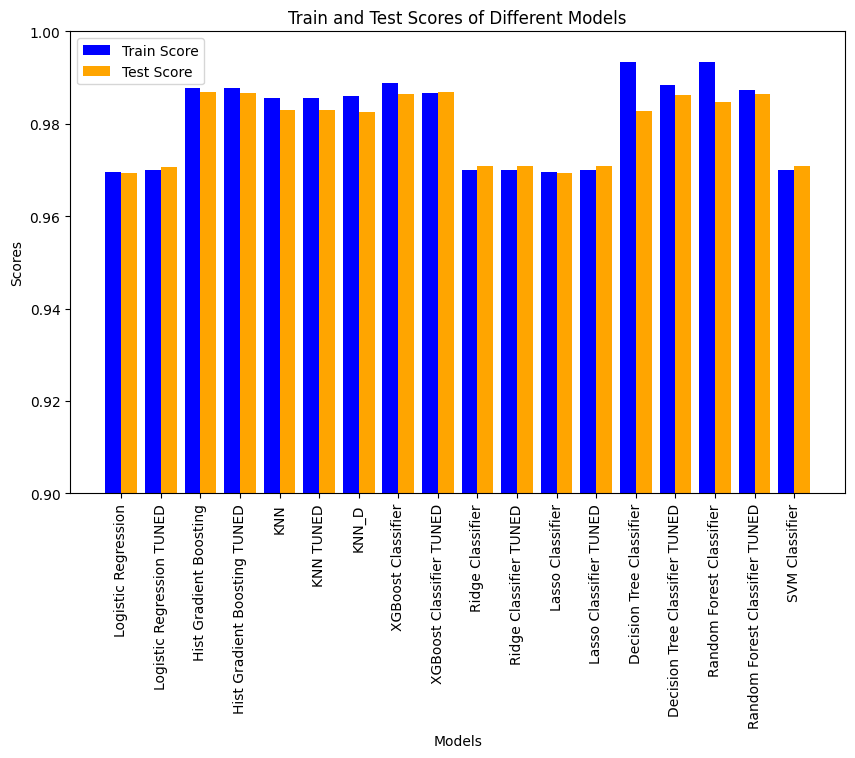

In [ ]:
models = list(model_scores.keys())
train_scores = [model_scores[model]["Train Score"] for model in models]
test_scores = [model_scores[model]["Test Score"] for model in models]

x = range(len(models))

plt.figure(figsize=(10, 6))
plt.bar(x, train_scores, width=0.4, label='Train Score', color='b', align='center')
plt.bar([p + 0.4 for p in x], test_scores, width=0.4, label='Test Score', color='orange', align='center')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Train and Test Scores of Different Models')
plt.xticks([p + 0.2 for p in x], models , rotation =90)
plt.ylim(0.9, 1)
plt.legend()
plt.show()


In [ ]:
for i in model_scores:
        print(i)
        print(f'Used parameters: {model_scores[i]["Used parameters"]}')

Logistic Regression
Used parameters: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Logistic Regression TUNED
Used parameters: {'C': 0.01, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Hist Gradient Boosting
Used parameters: {'categorical_features': 'warn', 'class_weight': None, 'early_stopping': 'auto', 'interaction_cst': None, 'l2_regularization': 0.0, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_bins': 255, 'max_depth': None, 'max_features': 1.0, 'max_iter': 100, 'max_leaf_nodes': 31, 'min_samples_leaf': 20, 'monotonic_cst': No

Find at employees at risk of leaving.

In [ ]:
X = df_with_dummies.drop('STATUS_Beëindigd', axis=1)
y = df_with_dummies['STATUS_Beëindigd']

model = RandomForestClassifier()
kf = KFold(n_splits=10)

predicted_vals = []

for i, j in kf.split(X):
    X_train, X_test = X.iloc[i], X.iloc[j]
    y_train, y_test = y.iloc[i], y.iloc[j]
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    predicted_vals.extend(predictions)

df_n_dummies = pd.get_dummies(df , columns=['STATUS'] , drop_first=True)
df['pred_STATUS_Beëindigd'] = predicted_vals

at_risk_employees = df_n_dummies[(df_n_dummies['pred_STATUS_Beëindigd'] == True) & (df_n_dummies['STATUS_Beëindigd'] == False)]
at_risk_employees


,WerknemerID,datum,geboortedatum,indiensttreding_datum,uitdiensttreding_datum,leeftijd,lengte_dienst,stad,afdeling,klant_id,geslacht_id,geslacht,uitdiensttreding_reden,uitdiensttreding_type,STATUS_JAAR,BUSINESS_UNIT,pred_STATUS_Beëindigd,STATUS_Beëindigd
118,7987,2018-12-31 05:06:00,1997-03-23 05:06:00,2017-06-24 05:06:00,1905-01-01 05:06:00,21.0,1.0,Breda,BI,6,V,Vrouw,Niet van toepassing,Niet van toepassing,2018,Detachering,1,False
844,7802,2016-12-30 05:06:00,1995-10-18 05:06:00,2016-09-22 05:06:00,1905-01-01 05:06:00,21.0,0.0,Almere,BI,32,V,Vrouw,Niet van toepassing,Niet van toepassing,2016,Detachering,1,False
1089,7711,2016-12-30 05:06:00,1995-01-23 05:06:00,2016-05-03 05:06:00,1905-01-01 05:06:00,21.0,0.0,Lelystad,Accountant,1,V,Vrouw,Niet van toepassing,Niet van toepassing,2016,Detachering,1,False
2141,4771,2017-12-31 05:06:00,1952-12-31 05:06:00,2004-07-08 05:06:00,2018-01-01 05:06:00,65.0,13.0,Rotterdam,NaN,37,V,Vrouw,Niet van toepassing,Niet van toepassing,2017,Detachering,1,False
2612,5334,2011-12-31 05:06:00,1976-05-11 05:06:00,2006-06-18 05:06:00,1905-01-01 05:06:00,35.0,5.0,Almere,NaN,32,V,Vrouw,Niet van toepassing,Niet van toepassing,2011,Detachering,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48833,4382,2017-12-31 05:06:00,1970-06-25 05:06:00,2003-05-11 05:06:00,2018-02-16 05:06:00,47.0,14.0,NaN,Boekhouder,40,V,Vrouw,Niet van toepassing,Niet van toepassing,2017,Detachering,1,False
49045,7548,2016-12-30 05:06:00,1993-11-19 05:06:00,2015-09-18 05:06:00,1905-01-01 05:06:00,23.0,1.0,Eindhoven,NaN,31,M,Man,Niet van toepassing,Niet van toepassing,2016,Detachering,1,False
49121,8067,2018-12-31 05:06:00,1997-11-04 05:06:00,2017-10-21 05:06:00,1905-01-01 05:06:00,21.0,1.0,Zaandam,BI,8,M,Man,Niet van toepassing,Niet van toepassing,2018,Detachering,1,False
49553,2008,2013-12-31 05:06:00,1957-10-23 05:06:00,1996-08-31 05:06:00,1905-01-01 05:06:00,56.0,17.0,Haarlem,Financial controller,5,V,Vrouw,Niet van toepassing,Niet van toepassing,2013,Detachering,1,False
